In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import pylab as pylab
import seaborn as sns

from keras import Sequential
from keras.layers import Dense

from keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.optimizers.legacy import RMSprop

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("realtor-data.csv")
df

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
512154,for_sale,980000.0,3.0,2.0,0.05,"26-25 91st St, East Elmhurst, NY, 11369",26-25 91st St,East Elmhurst,New York,11369.0,1462.0,2001-03-09
512155,for_sale,719000.0,3.0,2.0,NaN,"1111 Banner Ave Apt 6B, Brooklyn, NY, 11235",1111 Banner Ave Apt 6B,Brooklyn,New York,11235.0,1100.0,1998-07-16
512156,for_sale,679000.0,1.0,1.0,NaN,"201 E 83rd St Apt 15E, New York City, NY, 10028",201 E 83rd St Apt 15E,New York City,New York,10028.0,NaN,2020-08-27
512157,for_sale,10875000.0,20.0,22.0,NaN,"189 Woodpoint Rd, Brooklyn, NY, 11211",189 Woodpoint Rd,Brooklyn,New York,11211.0,11335.0,NaN


In [3]:
df.isna().sum()

status               0
price                0
bed              98937
bath             95218
acre_lot        104979
full_address         0
street             616
city                59
state                0
zip_code           197
house_size      116466
sold_date       309652
dtype: int64

In [4]:
# Elimino la columna "sold_date" ya que la mayoría de sus registros son nulos
df.drop("sold_date", axis=1, inplace=True)

In [5]:
# Eliminos las columnas "full_address", "street", "city" y "state" ya que con el zip code nos basta
df.drop(["full_address", "street", "city"], axis=1, inplace=True)

In [6]:
# Elimino todas las filas con valores nulos
df.dropna(inplace=True)

In [7]:
df.shape

(294395, 8)

In [8]:
df["status"].unique()

array(['for_sale'], dtype=object)

In [9]:
# Tambien eliminamos la columna status, por que todos los valores son iguales
df.drop("status", axis=1, inplace=True)

In [10]:
# dummies
df = pd.get_dummies(df, columns=["state"])

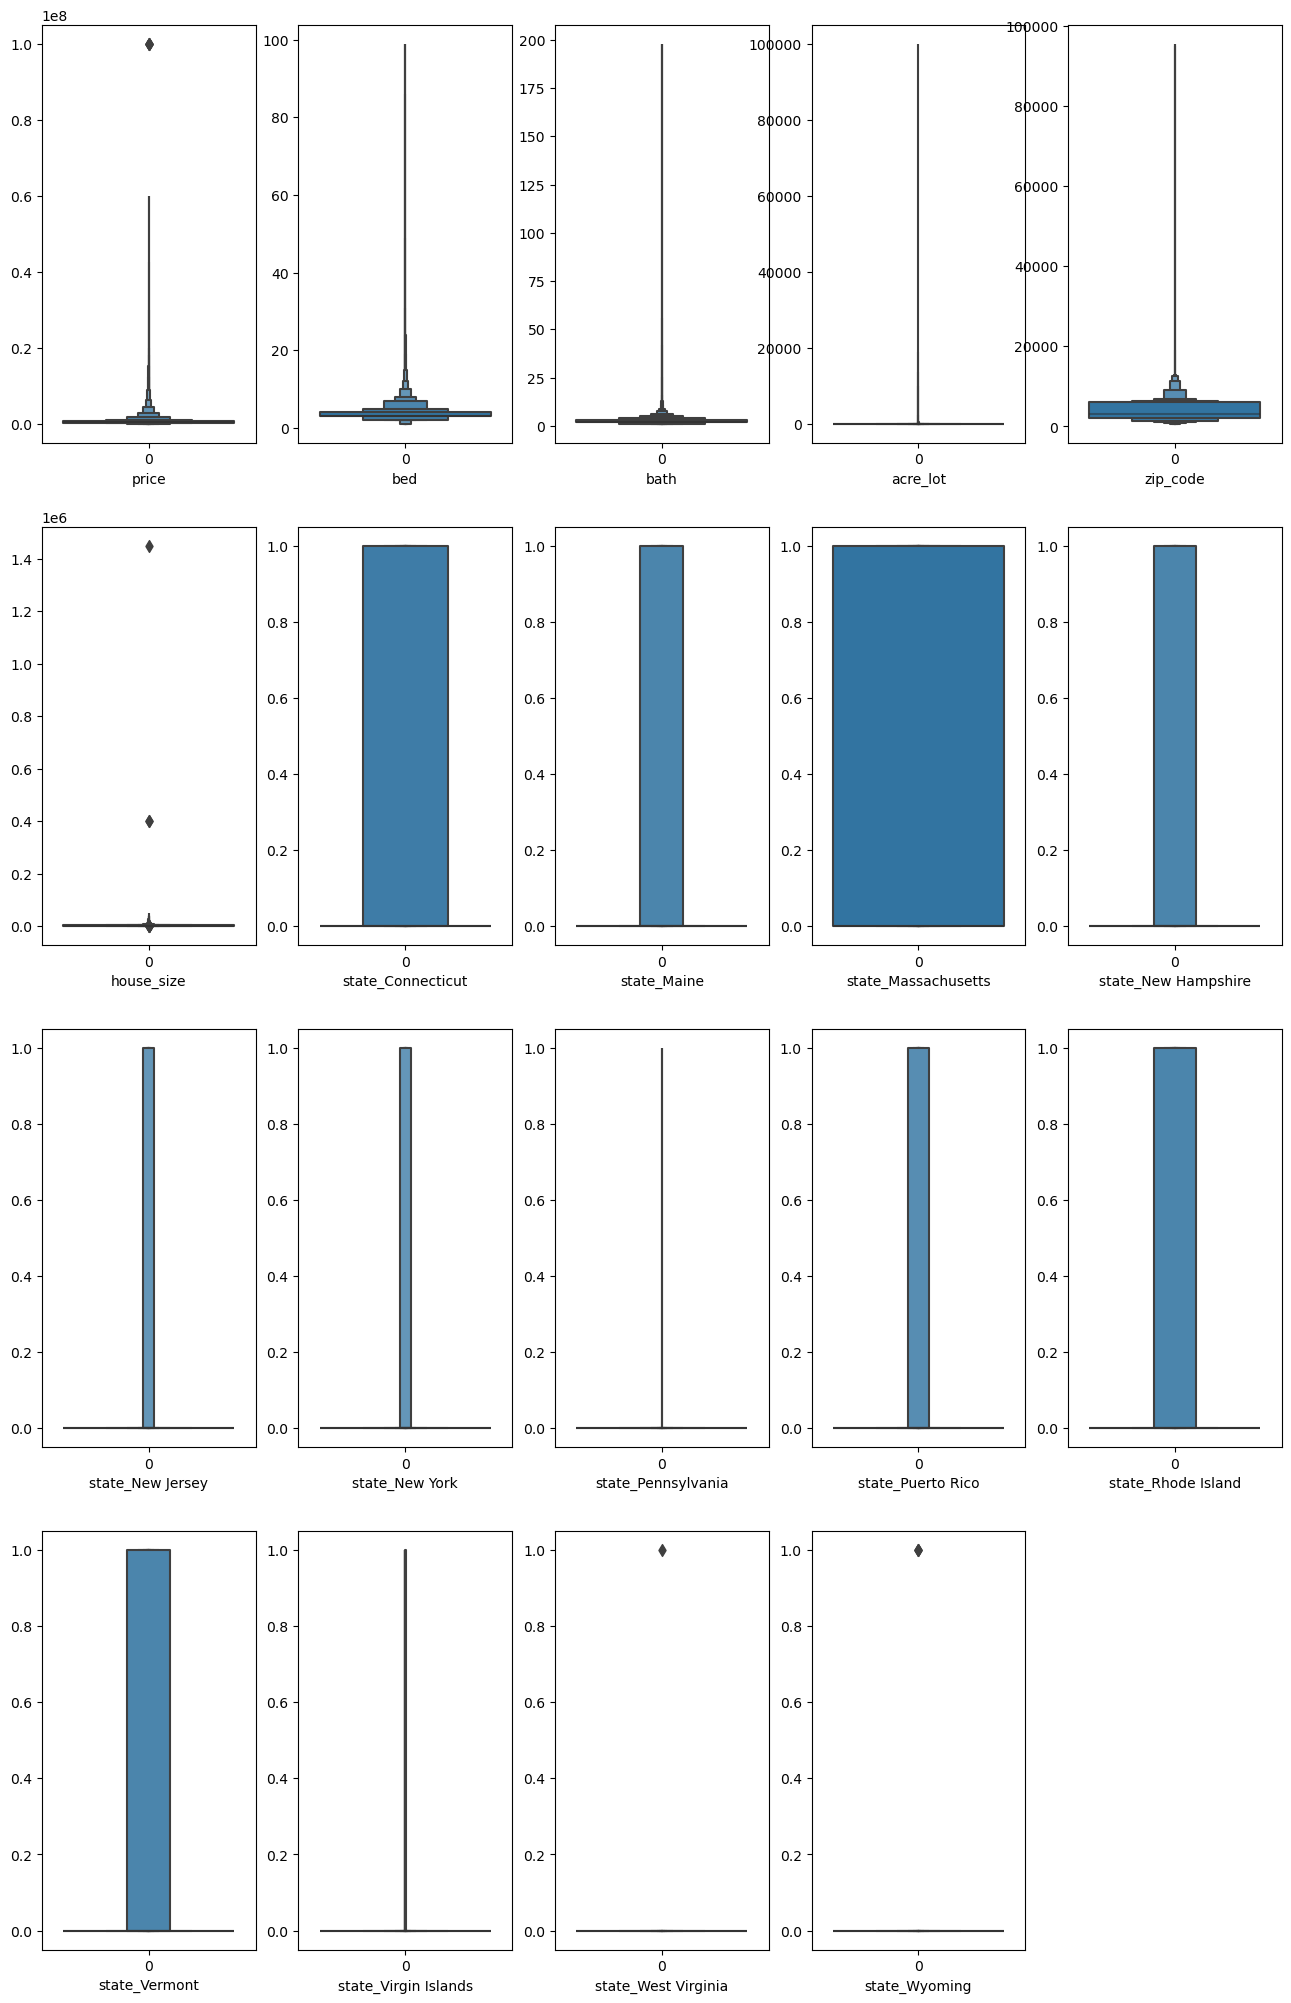

In [11]:
# Comprobamos si hay valores atipicos
plt.figure(figsize=(16,25))
plt.subplot(4,5,1)

for n in range(df.shape[1]):
    plt.subplot(4,5,n+1)
    sns.boxenplot(df.iloc[:,n])
    plt.xlabel(df.columns[n])

In [12]:
df["house_size"].sort_values(ascending=False).head(10)

10328     1450112.0
479983     400149.0
475143     400149.0
14210       49658.0
14296       49658.0
14172       49658.0
466015      47916.0
472774      43359.0
468054      41182.0
473425      41182.0
Name: house_size, dtype: float64

In [13]:
df["price"].sort_values(ascending=False).head(20)

463025    100000000.0
459321    100000000.0
459320    100000000.0
463024    100000000.0
416952     60000000.0
90704      60000000.0
42986      60000000.0
84325      60000000.0
427565     60000000.0
411635     60000000.0
98397      60000000.0
40599      60000000.0
85237      60000000.0
99438      60000000.0
418773     60000000.0
422397     60000000.0
409975     60000000.0
478258     45000000.0
476520     42500000.0
462145     40000000.0
Name: price, dtype: float64

### Eliminamos valores atipicos

In [14]:
_ = df[df["price"] > 1000000].index.tolist()

df.drop(_, inplace=True)

In [15]:
_ = df[df["zip_code"] > 13000].index.tolist()

df.drop(_, inplace=True)

In [16]:
_ = df[df["bath"] > 5].index.tolist()

df.drop(_, inplace=True)

In [17]:
_ = df[df["bed"] > 9].index.tolist()

df.drop(_, inplace=True)

In [18]:
_ = df[df["acre_lot"] > 5].index.tolist()

df.drop(_, inplace=True)

In [19]:

_ = df[df["house_size"] > 5000].index.tolist()

df.drop(_, inplace=True)

In [20]:
_ = df[df["house_size"] < 500].index.tolist()

df.drop(_, inplace=True)

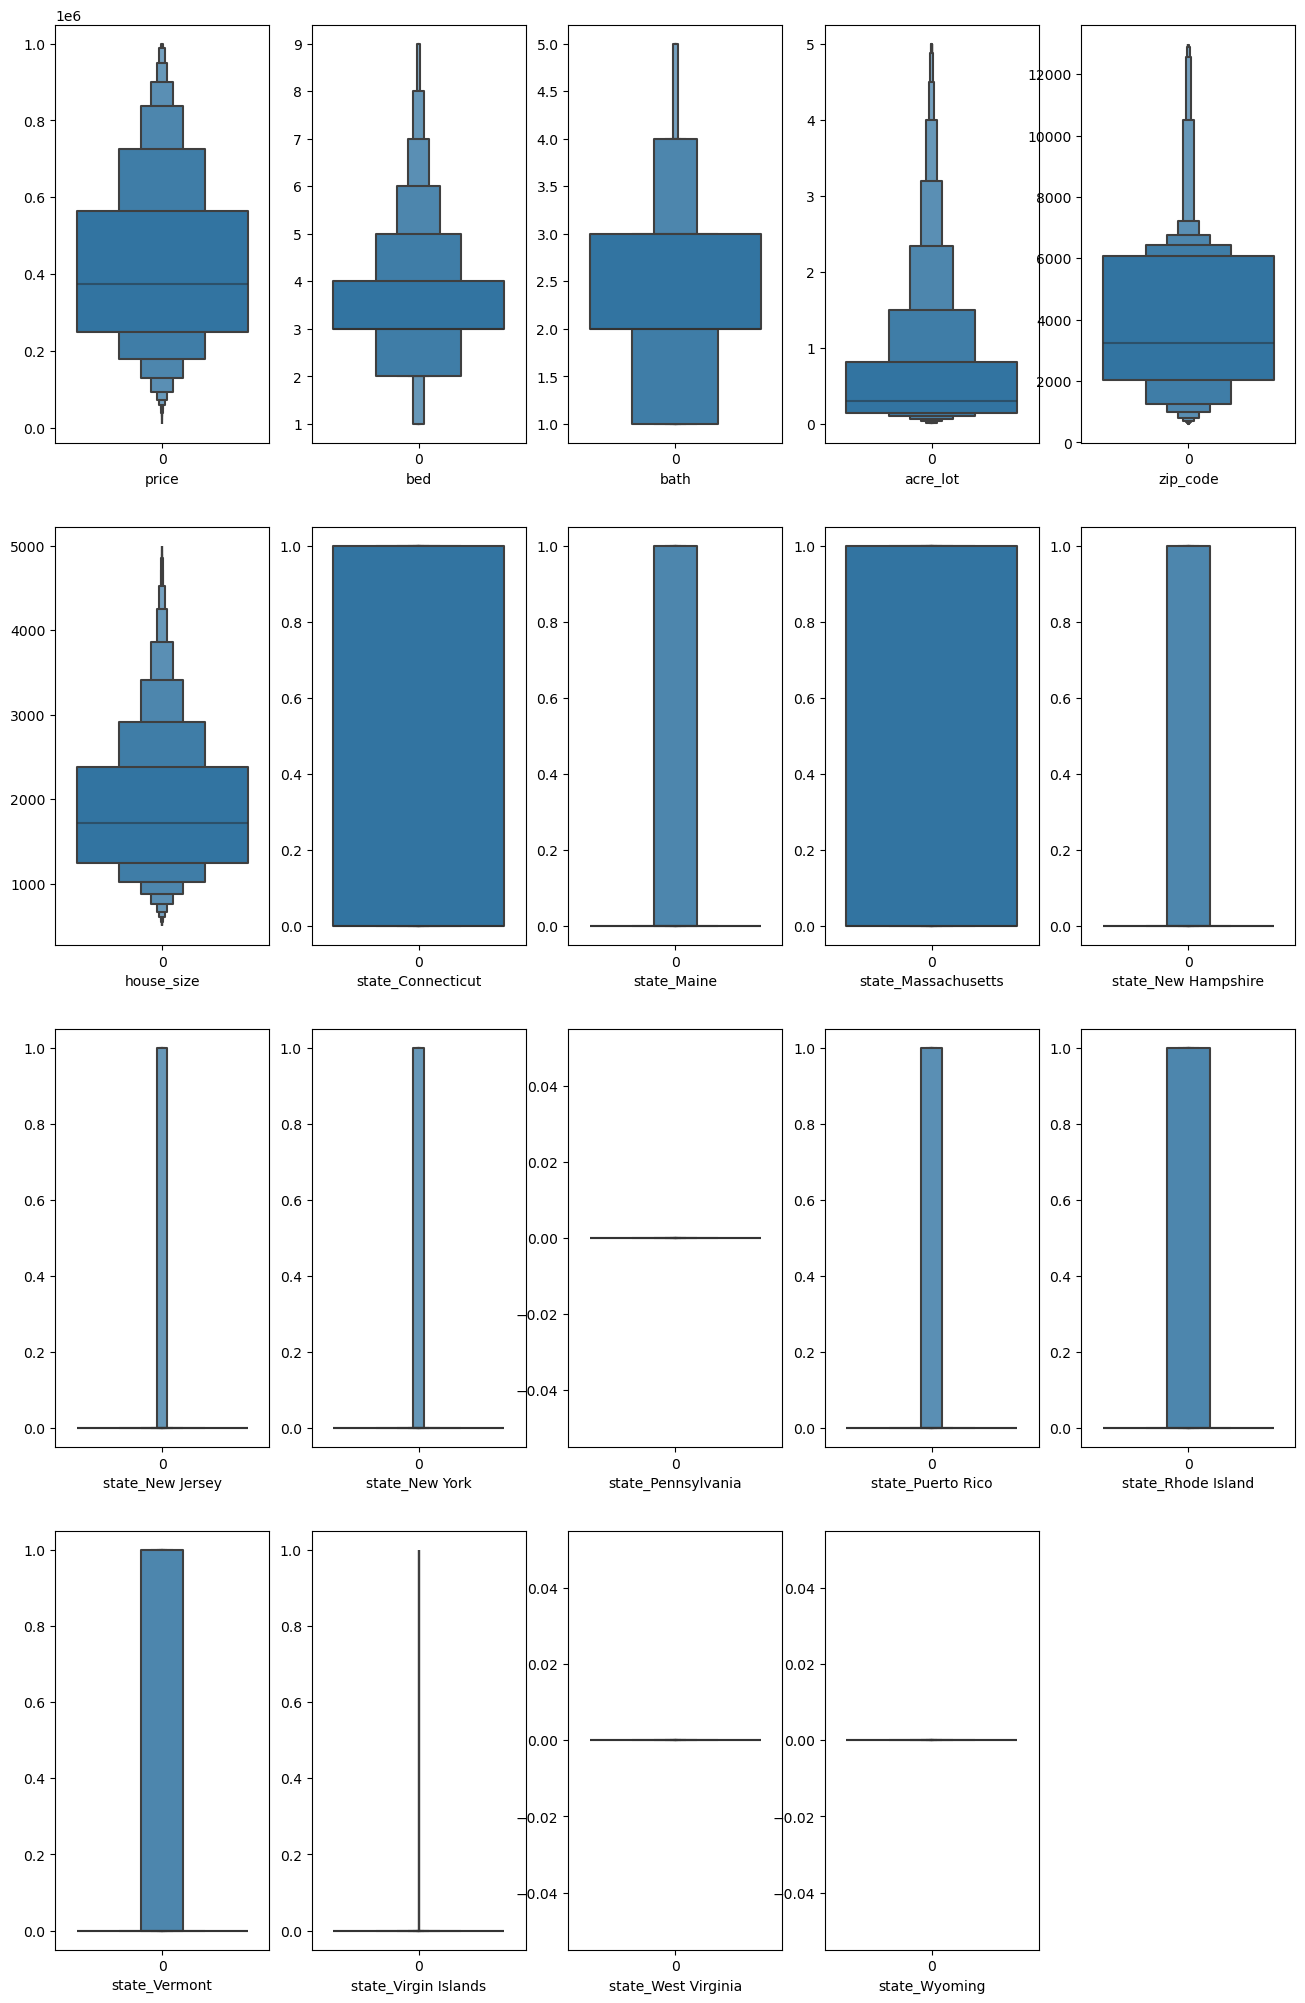

In [53]:
# Comprobamos si quedan valores atipicos
plt.figure(figsize=(16,25))
plt.subplot(4,5,1)

for n in range(df.shape[1]):
    plt.subplot(4,5,n+1)
    sns.boxenplot(df.iloc[:,n])
    plt.xlabel(df.columns[n])

In [54]:
df.shape

(227696, 19)

In [57]:
# Eliminamos los estados que no ofrecen registros
df.drop(["state_Pennsylvania", "state_West Virginia", "state_Wyoming"], axis=1, inplace=True)

## Division de los datos

In [58]:
x = df.drop("price", axis=1)
y = df["price"]

In [59]:
# Normalizacion de los datos
sc = StandardScaler()

x[x.columns] = sc.fit_transform(x)

In [60]:
# Separamos en conjunto de entrenamiento y conjunto de validacion
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2)

In [61]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((182156, 15), (45540, 15), (182156,), (45540,))

## Modelo

In [62]:
model = Sequential()

model.add(Dense(128, activation="relu", input_shape=[x_train.shape[1]]))

model.add(Dense(128, activation="relu"))

model.add(Dense(128, activation="relu"))

model.add(Dense(1))

model.compile(loss="mse", optimizer="adam", metrics = ["mae", "mse"])

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               2048      
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento

In [64]:
early_stop = EarlyStopping(monitor="val_loss", patience=10)

In [65]:
model.fit(x_train, y_train, epochs=100, validation_split=0.1, callbacks=early_stop)

Epoch 1/100
5124/5124 [==============================] - 6s 968us/step - loss: 37873373184.0000 - mae: 140397.1250 - mse: 37873373184.0000 - val_loss: 27066458112.0000 - val_mae: 122654.2969 - val_mse: 27066458112.0000
Epoch 2/100
5124/5124 [==============================] - 5s 988us/step - loss: 25412061184.0000 - mae: 119236.9844 - mse: 25412061184.0000 - val_loss: 25347614720.0000 - val_mae: 118786.6562 - val_mse: 25347614720.0000
Epoch 3/100
5124/5124 [==============================] - 5s 955us/step - loss: 24327245824.0000 - mae: 116518.4688 - mse: 24327245824.0000 - val_loss: 24691492864.0000 - val_mae: 117714.3203 - val_mse: 24691492864.0000
Epoch 4/100
5124/5124 [==============================] - 5s 950us/step - loss: 23788173312.0000 - mae: 115080.5391 - mse: 23788173312.0000 - val_loss: 24142686208.0000 - val_mae: 115494.2109 - val_mse: 24142686208.0000
Epoch 5/100
5124/5124 [==============================] - 5s 956us/step - loss: 23250167808.0000 - mae: 113584.2109 - mse: 23

5124/5124 [==============================] - 5s 967us/step - loss: 16591968256.0000 - mae: 93187.0391 - mse: 16591968256.0000 - val_loss: 16989734912.0000 - val_mae: 93166.5703 - val_mse: 16989734912.0000
Epoch 39/100
5124/5124 [==============================] - 5s 933us/step - loss: 16549263360.0000 - mae: 93062.1875 - mse: 16549263360.0000 - val_loss: 17287303168.0000 - val_mae: 94533.7031 - val_mse: 17287303168.0000
Epoch 40/100
5124/5124 [==============================] - 5s 934us/step - loss: 16536852480.0000 - mae: 93050.7031 - mse: 16536852480.0000 - val_loss: 16983499776.0000 - val_mae: 93792.0312 - val_mse: 16983499776.0000
Epoch 41/100
5124/5124 [==============================] - 5s 930us/step - loss: 16495874048.0000 - mae: 92921.9688 - mse: 16495874048.0000 - val_loss: 17160954880.0000 - val_mae: 94678.3203 - val_mse: 17160954880.0000
Epoch 42/100
5124/5124 [==============================] - 5s 947us/step - loss: 16481046528.0000 - mae: 92847.4531 - mse: 16481046528.0000 - 

Epoch 76/100
5124/5124 [==============================] - 5s 942us/step - loss: 15717931008.0000 - mae: 90672.0859 - mse: 15717931008.0000 - val_loss: 16202172416.0000 - val_mae: 93124.8594 - val_mse: 16202172416.0000
Epoch 77/100
5124/5124 [==============================] - 5s 938us/step - loss: 15693142016.0000 - mae: 90536.6172 - mse: 15693142016.0000 - val_loss: 16278290432.0000 - val_mae: 92758.8828 - val_mse: 16278290432.0000
Epoch 78/100
5124/5124 [==============================] - 5s 967us/step - loss: 15666182144.0000 - mae: 90507.9609 - mse: 15666182144.0000 - val_loss: 16253543424.0000 - val_mae: 90629.2422 - val_mse: 16253543424.0000
Epoch 79/100
5124/5124 [==============================] - 5s 953us/step - loss: 15680144384.0000 - mae: 90508.2500 - mse: 15680144384.0000 - val_loss: 16296056832.0000 - val_mae: 92220.1562 - val_mse: 16296056832.0000
Epoch 80/100
5124/5124 [==============================] - 5s 959us/step - loss: 15647026176.0000 - mae: 90481.5781 - mse: 156470

In [66]:
y_pred = model.predict(x_test).flatten()

1424/1424 [==============================] - 1s 585us/step


In [67]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=1)

print('Testing MAE: {:5.2f} MPG'.format(mae))
print('Testing RMSE: {:5.2f} MPG'.format(mse**0.5))

1424/1424 [==============================] - 1s 718us/step - loss: 15589551104.0000 - mae: 89363.1094 - mse: 15589551104.0000
Testing MAE: 89363.11 MPG
Testing RMSE: 124858.12 MPG


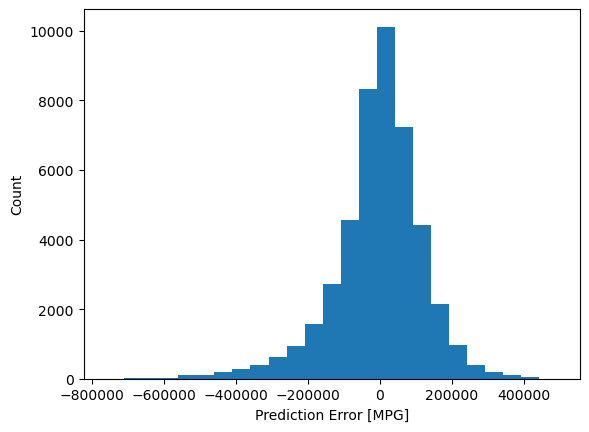

In [68]:
error = y_pred - y_test

pylab.hist(error, bins = 25)

pylab.xlabel('Prediction Error [MPG]')
_ = pylab.ylabel('Count')

## Conclusion

Nuestro modelo tieene un MAE de 90.000 lo cual no está muy bien pero como podemos observar en el gráfico superior donde más falla es a la hora de predecir unos pocos resultados que da como resultado valores muy inferiores. Quitando esos valores, en general nuestro modelo predice bastante bien, en la mayoría de valores tiene una desviación de +- 30.000.

He tratado de limpiar lo mejor posible los datos para reducir ese error e igualmente he probado con añadir capas pero aún así nuestro error no baja. A lo mejor si añadía más epocas conseguía bajar un poco más ese error pero no iba a ser una gran diferencia.